# Week6-7: Thematic Analysis with BERTopic

In [1]:
pip install bertopic

  Obtaining dependency information for tokenizers<0.22,>=0.21 from https://files.pythonhosted.org/packages/22/7a/88e58bb297c22633ed1c9d16029316e5b5ac5ee44012164c2edede599a5e/tokenizers-0.21.0-cp39-abi3-macosx_11_0_arm64.whl.metadata
  Using cached tokenizers-0.21.0-cp39-abi3-macosx_11_0_arm64.whl.metadata (6.7 kB)
Using cached tokenizers-0.21.0-cp39-abi3-macosx_11_0_arm64.whl (2.6 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install transformers -U

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install sentence-transformers scikit-learn

  Obtaining dependency information for tokenizers<0.22,>=0.21 from https://files.pythonhosted.org/packages/22/7a/88e58bb297c22633ed1c9d16029316e5b5ac5ee44012164c2edede599a5e/tokenizers-0.21.0-cp39-abi3-macosx_11_0_arm64.whl.metadata
  Using cached tokenizers-0.21.0-cp39-abi3-macosx_11_0_arm64.whl.metadata (6.7 kB)
Using cached tokenizers-0.21.0-cp39-abi3-macosx_11_0_arm64.whl (2.6 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tokenizers==0.13.3

  Obtaining dependency information for tokenizers==0.13.3 from https://files.pythonhosted.org/packages/0c/e0/f51b2d52fcc2c64e0b81da0a1c68d57b3859212143dbc64b0d175ed78693/tokenizers-0.13.3-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached tokenizers-0.13.3-cp311-cp311-macosx_12_0_arm64.whl.metadata (6.7 kB)
Using cached tokenizers-0.13.3-cp311-cp311-macosx_12_0_arm64.whl (3.9 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.0
    Uninstalling tokenizers-0.21.0:
      Successfully uninstalled tokenizers-0.21.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.47.0 requires tokenizers<0.22,>=0.21, but you have tokenizers 0.13.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install --upgrade huggingface_hub

  Obtaining dependency information for huggingface_hub from https://files.pythonhosted.org/packages/44/5a/dc6af87c61f89b23439eb95521e4e99862636cfd538ae12fd36be5483e5f/huggingface_hub-0.26.5-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.8/447.8 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.26.2
    Uninstalling huggingface-hub-0.26.2:
      Successfully uninstalled huggingface-hub-0.26.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.47.0 requires tokenizers<0.22,>=0.21, but you have tokenizers 0.13.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade transformers

  Obtaining dependency information for tokenizers<0.22,>=0.21 from https://files.pythonhosted.org/packages/22/7a/88e58bb297c22633ed1c9d16029316e5b5ac5ee44012164c2edede599a5e/tokenizers-0.21.0-cp39-abi3-macosx_11_0_arm64.whl.metadata
  Using cached tokenizers-0.21.0-cp39-abi3-macosx_11_0_arm64.whl.metadata (6.7 kB)
Using cached tokenizers-0.21.0-cp39-abi3-macosx_11_0_arm64.whl (2.6 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
Note: you may need to restart the kernel to use updated packages.


# Thematic analysis Overview

In [4]:
import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Load the original dataset with reviews, sentiment, and published_date
df = pd.read_csv('simplified_reviews_with_sentiment.csv')

# Ensure the 'published_date' is in datetime format
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df = df.dropna(subset=['published_date'])

# Load the pre-trained model for embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for the reviews
embeddings = model.encode(df['cleaned_review'].to_list(), show_progress_bar=True)

# Fit the BERTopic model and get topics for each review
topic_model = BERTopic()
topics, _ = topic_model.fit_transform(df['cleaned_review'].to_list(), embeddings)

# Add the topic labels back to the original DataFrame
df['topic'] = topics

# Save the updated DataFrame with topics and original dates
df.to_csv('thematic_analysis_per_review.csv', index=False)
print("Thematic analysis with individual review dates saved successfully!")

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

Thematic analysis with individual review dates saved successfully!


In [5]:
# function for Top 15 Topics
def print_top_topics(topic_model, reviews, sentiment):
    print(f"\nTop 15 Topics for {sentiment.capitalize()} Reviews:")
    topics, _ = topic_model.fit_transform(reviews)
    topic_info = topic_model.get_topic_info().head(15)
    for index, row in topic_info.iterrows():
        print(f"Topic {row['Topic']}: {row['Name']} (Count: {row['Count']})")

import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Load Model for embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')

# Load Dataset
df = pd.read_csv('thematic_analysis_per_review.csv')

# Separate Positive and Negative Reviews
positive_reviews = df[df['sentiment'] == 'positive']['cleaned_review']
negative_reviews = df[df['sentiment'] == 'negative']['cleaned_review']

# Create embeddings
positive_embeddings = model.encode(positive_reviews.to_list(), show_progress_bar=True)
negative_embeddings = model.encode(negative_reviews.to_list(), show_progress_bar=True)

# Analyst with BERTopic for Positive Reviews
positive_topic_model = BERTopic()
positive_topic_model.fit(positive_reviews.to_list(), positive_embeddings)

# Analyst with BERTopic for Negative Reviews
negative_topic_model = BERTopic()
negative_topic_model.fit(negative_reviews.to_list(), negative_embeddings)

# print Top 15 Topics for Positive Reviews
print_top_topics(positive_topic_model, positive_reviews, 'positive')

# print Top 15 Topics for Negative Reviews
print_top_topics(negative_topic_model, negative_reviews, 'negative')

Batches:   0%|          | 0/177 [00:00<?, ?it/s]

Batches:   0%|          | 0/137 [00:00<?, ?it/s]


Top 15 Topics for Positive Reviews:
Topic -1: -1_flight_singapore_airline_good (Count: 2811)
Topic 0: 0_food_singapore_airline_good (Count: 374)
Topic 1: 1_food_good_crew_service (Count: 339)
Topic 2: 2_airline_singapore_service_always (Count: 276)
Topic 3: 3_sydney_singapore_brisbane_melbourne (Count: 199)
Topic 4: 4_service_staff_check_great (Count: 190)
Topic 5: 5_movie_film_good_great (Count: 108)
Topic 6: 6_class_business_singapore_lounge (Count: 106)
Topic 7: 7_sq_always_flying_experience (Count: 103)
Topic 8: 8_airline_singapore_year_best (Count: 74)
Topic 9: 9_kid_child_baby_old (Count: 66)
Topic 10: 10_economy_premium_seat_extra (Count: 61)
Topic 11: 11_passenger_seat_class_business (Count: 60)
Topic 12: 12_earphone_seat_good_plane (Count: 55)
Topic 13: 13_sia_always_flight_service (Count: 51)

Top 15 Topics for Negative Reviews:
Topic -1: -1_flight_singapore_airline_seat (Count: 2122)
Topic 0: 0_ticket_refund_customer_flight (Count: 508)
Topic 1: 1_seat_bed_flat_leg (Count: 

## Visualisation all Topics

In [7]:
# Generate Intertopic Distance Map for Positive Reviews
print("Generating Intertopic Distance Map for Positive Reviews...")
positive_map = positive_topic_model.visualize_topics()
positive_map.show()  

# Generate Intertopic Distance Map for Negative Reviews
print("Generating Intertopic Distance Map for Negative Reviews...")
negative_map = negative_topic_model.visualize_topics()
negative_map.show()

Generating Intertopic Distance Map for Positive Reviews...


Generating Intertopic Distance Map for Negative Reviews...


## Visualisation of Top 30 Topics 

In [6]:
from bertopic import BERTopic
import matplotlib.pyplot as plt

# Function to visualize top N topics
def visualize_limited_topics(topic_model, num_topics=30, title="Intertopic Distance Map"):
    # Generate intertopic distance map limited to `top_n_topics`
    fig = topic_model.visualize_topics(top_n_topics=num_topics)
    fig.update_layout(
        title=title,
        font=dict(size=14),
        showlegend=False,
        xaxis_title="Dimension 1 (D1)",
        yaxis_title="Dimension 2 (D2)"
    )
    # Save the visualization to a file
    fig.write_image(f"{title.replace(' ', '_').lower()}.png")  # Save as PNG for clarity in reports
    fig.show()

# Generate and visualize for Positive Reviews
print("Generating Intertopic Distance Map for Positive Reviews...")
visualize_limited_topics(positive_topic_model, num_topics=30, title="Top 30 Topics - Positive Reviews")

# Generate and visualize for Negative Reviews
print("Generating Intertopic Distance Map for Negative Reviews...")
visualize_limited_topics(negative_topic_model, num_topics=30, title="Top 30 Topics - Negative Reviews")

Generating Intertopic Distance Map for Positive Reviews...


Generating Intertopic Distance Map for Negative Reviews...


## Most frequency words 

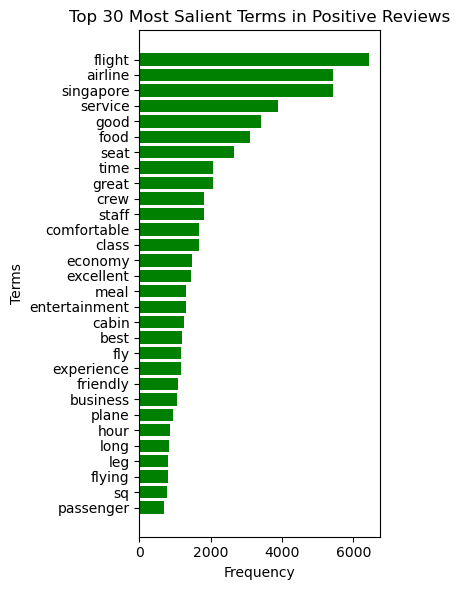

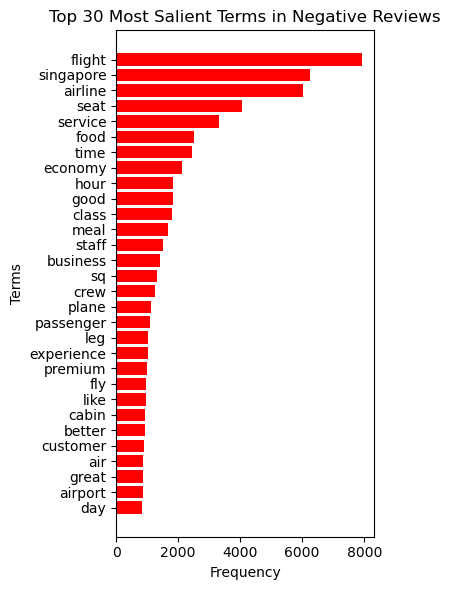

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Function to extract top terms
def get_top_terms(reviews, top_n=30):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(reviews)
    word_counts = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': X.toarray().sum(axis=0)})
    return word_counts.sort_values(by='count', ascending=False).head(top_n)

# Load dataset
df = pd.read_csv('thematic_analysis_per_review.csv')

# Separate reviews by sentiment
positive_reviews = df[df['sentiment'] == 'positive']['cleaned_review'].dropna()
negative_reviews = df[df['sentiment'] == 'negative']['cleaned_review'].dropna()

# Get top 30 terms for positive and negative reviews
top_positive_terms = get_top_terms(positive_reviews, top_n=30)
top_negative_terms = get_top_terms(negative_reviews, top_n=30)

# Plotting function with color
def plot_top_terms(data, title, color):
    plt.figure(figsize=(4, 6))
    plt.barh(data['word'], data['count'], color=color)
    plt.xlabel('Frequency')
    plt.ylabel('Terms')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Plot top 30 terms for positive and negative reviews with color coding
plot_top_terms(top_positive_terms, 'Top 30 Most Salient Terms in Positive Reviews', color='green')
plot_top_terms(top_negative_terms, 'Top 30 Most Salient Terms in Negative Reviews', color='red')

# Thematic analysis by phase

In [25]:
import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Load the dataset
df = pd.read_csv('cleaned_reviews_with_datetime.csv')

# Ensure the 'published_date' column is in datetime format
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df = df.dropna(subset=['published_date'])

# Define the determine_phase function
def determine_phase(date):
    if date < pd.Timestamp('2020-01-01'):
        return 'Pre-COVID'
    elif pd.Timestamp('2020-01-01') <= date <= pd.Timestamp('2021-12-31'):
        return 'During COVID-19'
    else:
        return 'Post-COVID'

# Add the 'phase' column
df['phase'] = df['published_date'].apply(determine_phase)

# Load the pre-trained model for embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')

# Create an empty list to store the processed data
processed_data = []

# Process each phase and sentiment separately
phases = df['phase'].unique()
sentiments = df['sentiment'].unique()

for phase in phases:
    for sentiment in sentiments:
        # Filter reviews by phase and sentiment
        filtered_data = df[(df['phase'] == phase) & (df['sentiment'] == sentiment)]
        
        if filtered_data.empty:
            continue  # Skip if no data for this combination
        
        # Generate embeddings
        reviews = filtered_data['cleaned_review'].dropna().to_list()
        embeddings = model.encode(reviews, show_progress_bar=True)
        
        # Fit BERTopic for the specific phase and sentiment
        topic_model = BERTopic()
        topics, _ = topic_model.fit_transform(reviews, embeddings)
        
        # Check length consistency
        if len(topics) != len(reviews):
            print(f"Warning: Mismatch in topics and reviews for Phase: {phase}, Sentiment: {sentiment}")
            continue
        
        # Get topic information
        topic_info = topic_model.get_topic_info()
        
        # Map topic ID and labels back to original data
        for idx, (review, topic_id) in enumerate(zip(reviews, topics)):
            if topic_id == -1:  # Skip outliers
                topic_label = "Outlier"
                keywords = ""
            else:
                try:
                    topic_label = topic_info[topic_info['Topic'] == topic_id]['Name'].values[0]
                    keywords = ", ".join([kw[0] for kw in topic_model.get_topic(topic_id)])
                except IndexError:
                    topic_label = "Unknown"
                    keywords = "N/A"
            
            processed_data.append({
                "Review": review,
                "Phase": phase,
                "Sentiment": sentiment,
                "Topic ID": topic_id,
                "Topic Label": topic_label,
                "Keyword List": keywords
            })

# Convert processed data to DataFrame
processed_df = pd.DataFrame(processed_data)

# Save to a new CSV file
processed_df.to_csv('thematic_analysis_by_phase_sentiment.csv', index=False)
print("Thematic analysis saved successfully!")

Batches:   0%|          | 0/30 [00:00<?, ?it/s]

Batches:   0%|          | 0/8 [00:00<?, ?it/s]

Batches:   0%|          | 0/15 [00:00<?, ?it/s]

Batches:   0%|          | 0/17 [00:00<?, ?it/s]

Batches:   0%|          | 0/93 [00:00<?, ?it/s]

Batches:   0%|          | 0/153 [00:00<?, ?it/s]

Thematic analysis saved successfully!


In [27]:
import pandas as pd
from tabulate import tabulate  # To create a readable table format

# Load the processed data
processed_df = pd.read_csv('thematic_analysis_by_phase_sentiment.csv')

# Group data by Phase, Sentiment, and Topic ID
topic_summary = (
    processed_df.groupby(['Phase', 'Sentiment', 'Topic ID', 'Topic Label', 'Keyword List'])
    .size()
    .reset_index(name='Count')
    .sort_values(by=['Phase', 'Sentiment', 'Count'], ascending=[True, True, False])
)

# Print the summary as a table for readability
print("\nSummary of Topics by Phase and Sentiment:\n")
print(tabulate(topic_summary, headers='keys', tablefmt='grid', showindex=False))

# Save the topic summary to a new CSV file
topic_summary.to_csv('topic_summary_table.csv', index=False)
print("\nTopic summary table saved to 'topic_summary_table.csv'")


Summary of Topics by Phase and Sentiment:

+-----------------+-------------+------------+--------------------------------------------+----------------------------------------------------------------------------------------------------+---------+
| Phase           | Sentiment   |   Topic ID | Topic Label                                | Keyword List                                                                                       |   Count |
+=================+=============+============+============================================+====================================================================================================+=========+
| During COVID-19 | negative    |          0 | 0_flight_seat_singapore_airline            | flight, seat, singapore, airline, service, food, good, class, meal, economy                        |     284 |
+-----------------+-------------+------------+--------------------------------------------+-----------------------------------------------------

In [38]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords, wordnet

# Load the processed data with topics
processed_df = pd.read_csv('thematic_analysis_by_phase_sentiment.csv')

# Define the Skytrax criteria (combine from different categories)
skytrax_criteria = [
    "Boarding assistance",
    "Service friendliness / hospitality",
    "Service attentiveness / efficiency",
    "Ticketing",
    "Assisting families",
    "Online booking and check-in services",
    "Baggage delivery",
    "Seat comfort",
    "Cleanliness",
    "Meal service efficiency",
    "Entertainment",
    "Airline Lounge : product facilities"
]

# Function to expand Skytrax criteria with synonyms using WordNet
def expand_keywords(criteria):
    expanded = []
    for word in criteria.split():
        synonyms = wordnet.synsets(word)
        for syn in synonyms:
            expanded.extend(syn.lemma_names())
    return list(set(expanded))

# Expand Skytrax criteria
expanded_criteria = [" ".join(expand_keywords(criterion)) for criterion in skytrax_criteria]

# Initialize models
model = SentenceTransformer('all-MiniLM-L6-v2')
skytrax_embeddings = model.encode(expanded_criteria)

# Group topics by unique Topic ID and Keyword List
topic_data = (
    processed_df[['Topic ID', 'Keyword List']]
    .drop_duplicates()
    .reset_index(drop=True)
)

# Filter out common words that do not add value
custom_stopwords = set(stopwords.words('english') + ['singapore', 'airline', 'flight'])

def clean_keywords(keyword_list):
    if isinstance(keyword_list, str):  # Check if the entry is a string
        return ", ".join([word for word in keyword_list.split(", ") if word.lower() not in custom_stopwords])
    return ""  # Return an empty string for non-string entries (e.g., NaN or float)

# Apply the cleaning function to the Keyword List
topic_data['Filtered Keywords'] = topic_data['Keyword List'].apply(clean_keywords)

# Encode Filtered Keyword Lists
topic_data['Keyword Embedding'] = model.encode(topic_data['Filtered Keywords'].tolist()).tolist()

# Rule-based mapping with additional synonyms for criteria
def rule_based_mapping(keywords):
    rules = {
        "Boarding assistance": ["boarding", "help", "assistance", "counter", "delayed"],
        "Service friendliness / hospitality": [ "friendly", "hospitality", "kind", "crew"],
        "Service attentiveness / efficiency": [ "crew", "assist", "helpful"],
        "Ticketing": ["ticket", "call", "refund"],
        "Online booking and check-in services": ["booking", "check", "book"],
        "Assisting families": ["parent", "family", "families", "baby", "bassinet", "child"],
        "Baggage delivery": ["luggage", "baggage", "lost", "bag", "suitcase", "damaged"],
        "Seat comfort": ["seat", "legroom", "comfortable", "bed", "room"],
        "Cleanliness": ["clean", "hygiene", "toilet", "dirty"],
        "Meal service efficiency": ["meal", "food", "serve", "dietary", "vegetarian", "wine", "drink"],
        "Entertainment": ["entertainment", "movie", "film"],
        "Airline Lounge : product facilities": ["lounge", ]
    }
    for criterion, keywords_list in rules.items():
        if any(word in keywords for word in keywords_list):
            return criterion
    return None

# Function to compute similarity using embeddings and TF-IDF
def compute_similarity(row, tfidf_matrix, tfidf_criteria_matrix):
    topic_embedding = row['Keyword Embedding']
    similarities = cosine_similarity([topic_embedding], skytrax_embeddings)[0]
    tfidf_similarities = cosine_similarity(tfidf_matrix[row.name], tfidf_criteria_matrix)[0]

    # Combine scores with dynamic weighting
    combined_similarities = (0.7 * similarities + 0.3 * tfidf_similarities)
    best_match_idx = combined_similarities.argmax()

    return pd.Series({
        'Mapped Skytrax Criterion': skytrax_criteria[best_match_idx],
        'Similarity Score': combined_similarities[best_match_idx]
    })

# Prepare TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(topic_data['Filtered Keywords'].tolist())
tfidf_criteria_matrix = vectorizer.transform(skytrax_criteria)

# Apply rule-based mapping and similarity mapping
topic_data['Mapped by Rules'] = topic_data['Filtered Keywords'].apply(rule_based_mapping)

similarity_results = topic_data.apply(
    lambda row: compute_similarity(row, tfidf_matrix, tfidf_criteria_matrix), axis=1
)

topic_data[['Mapped Skytrax Criterion', 'Similarity Score']] = similarity_results

# Final mapping: prioritize rule-based mapping if available
topic_data['Final Mapped Skytrax Criterion'] = topic_data.apply(
    lambda row: row['Mapped by Rules'] if row['Mapped by Rules'] else row['Mapped Skytrax Criterion'],
    axis=1
)

# Drop unnecessary columns for clean output
topic_data = topic_data.drop(columns=['Keyword Embedding', 'Mapped by Rules'])

# Save the mapping results to a CSV file
topic_data.to_csv('topic_to_skytrax_mapping_with_keywords.csv', index=False)

# Print the mapping results
print("\nTopic to Skytrax Mapping (Hybrid Approach with Semantic Expansion):\n")
print(topic_data)


Topic to Skytrax Mapping (Hybrid Approach with Semantic Expansion):

    Topic ID                                       Keyword List  \
0          0  flight, seat, singapore, airline, food, econom...   
1         -1                                                NaN   
2          1  flight, airline, singapore, customer, service,...   
3          3  singapore, airline, flight, airport, parent, s...   
4          2  luggage, airline, singapore, baggage, lost, ba...   
..       ...                                                ...   
77        35  seat, somewhat, position, one, comfortable, ex...   
78        41  cabin, interacted, averagethe, crew, communica...   
79        39  sq, audio, crew, volume, cabin, system, seat, ...   
80        42  vegetarian, indian, vegan, vegetarianvegan, ve...   
81        26  business, class, economy, suite, premium, fly,...   

                                    Filtered Keywords  \
0     seat, food, economy, meal, service, class, crew   
1          